In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.2MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=ad1c5f38171a1f915189601c3d66e7c9e70fbc274d0d45d21f7eeb2434694af3
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=f69ee8fde333d49464d3df4341e470e6c23227d5988012c6e3869358318f3951
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [6]:
df_jp_wm = pd.read_json('pretty_jp_tweets_complaint.json')

df_gs_wm = pd.read_json('pretty_gs_tweets_complaint.json')

df_ms_wm = pd.read_json('pretty_ms_tweets_complaint.json')

df_ml_wm = pd.read_json('pretty_ml_tweets_complaint.json')



#sample = pd.read_csv('TwitterData.csv')



In [7]:
df_jp_wm = df_jp_wm.assign(company = "JPM")

In [8]:
df_gs_wm = df_gs_wm.assign(company = "GS")

In [9]:
df_ml_wm = df_ml_wm.assign(company = "ML")

In [10]:
df_ms_wm = df_gs_wm.assign(company = "MS")

In [11]:
df_all_wm = pd.concat([df_jp_wm,df_gs_wm,df_ml_wm,df_ms_wm])

In [12]:
#Sentiment Analysis
#Vader Sentiment

In [13]:
analyzer = SentimentIntensityAnalyzer()

In [14]:
sentiment = df_all_wm['text'].apply(lambda x: analyzer.polarity_scores(x))

In [15]:
#Inserting the sentiment into the dataframe
df_all_wm = pd.concat([df_all_wm, sentiment.apply(pd.Series)],1)

In [16]:
df_all_wm.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound
0,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,JPM,0.124,0.876,0.000,-0.7003
1,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",0,NurseRabbi,Banks not compliant! @JPMorgan_UK chase! No ex...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-12 18:11:16,2018-08-12 18:11:16,1028705490887421952,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,,JPM,0.192,0.719,0.089,-0.7405
2,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],0,andthatrhymeswi,The US foolishly levied tariffs on art in the ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-10 13:57:15,2018-08-10 13:57:15,1027916790314229760,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,,JPM,0.091,0.807,0.102,0.1049
3,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],0,NeedaHobby1,2013: JP Morgan Chase reached a record settlem...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-29 20:06:39,2018-07-29 20:06:39,1023661100913459200,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,,JPM,0.213,0.675,0.112,-0.7627
4,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,JPM,0.124,0.876,0.000,-0.7003
5,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",0,NurseRabbi,Banks not compliant! @JPMorgan_UK chase! No ex...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-12 18:11:16,2018-08-12 18:11:16,1028705490887421952,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,,JPM,0.192,0.719,0.089,-0.7405
6,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],0,andthatrhymeswi,The US foolishly levied tariffs on art in the ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-10 13:57:15,2018-08-10 13:57:15,1027916790314229760,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,,JPM,0.091,0.807,0.102,0.1049
7,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],0,NeedaHobby1,2013: JP Morgan Chase reached a record settlem...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-29 20:06:39,2018-07-29 20:06:39,1023661100913459200,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,,JPM,0.213,0.675,0.112,-0.7627
8,False,"[IlhanOmar, JPMorgan, Dollar, Breakingnews, Br...",[],False,False,0,[https://infiniteunknown.net/2019/07/23/world-...,,0,[],1,SecretNews,"World News (July 23, 2019 Edition): Ethics Com...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-23 23:12:50,2019-07-23 23:12:50,1153805196595609600,/SecretNews/status/1153805196595609600,144737971,Infinite Unknown,,JPM,0.243,0.757,0.000,-0.8720
9,False,[],[],True,False,9,[http://superhappyfunamerica.com],,5,[],6,SuperHappyFunA,The http://superhappyfunamerica.com website h...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-13 01:48:11,2019-07-13 01:48:11,1149858028465872896,/SuperHappyFunA/status/1149858028465872896,1136796030920470528,SuperHappyFunAmerica,,JPM,0.250,0.

In [17]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [18]:
df_all_wm['date'] = df_all_wm['timestamp'].apply(lambda x: x.date())

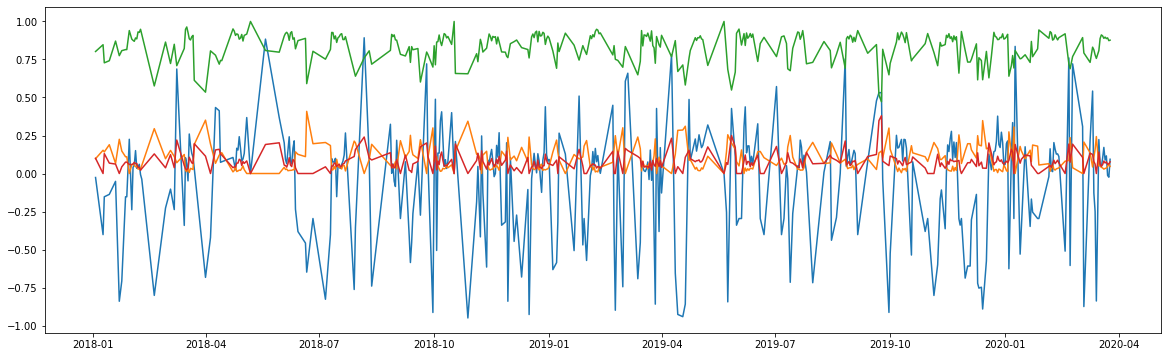

In [19]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df_all_wm.groupby('date').mean()['compound'].index, df_all_wm.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df_all_wm.groupby('date').mean()['neg'].index, df_all_wm.groupby('date').mean()['neg'].values)
plt.plot(df_all_wm.groupby('date').mean()['neu'].index, df_all_wm.groupby('date').mean()['neu'].values)
plt.plot(df_all_wm.groupby('date').mean()['pos'].index, df_all_wm.groupby('date').mean()['pos'].values)

In [20]:
df_wm_sent_jp = df_all_wm[df_all_wm['company'] == 'JPM']
df_wm_sent_jp.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,JPM,0.124,0.876,0.000,-0.7003,2018-08-30
1,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",0,NurseRabbi,Banks not compliant! @JPMorgan_UK chase! No ex...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-12 18:11:16,2018-08-12 18:11:16,1028705490887421952,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,,JPM,0.192,0.719,0.089,-0.7405,2018-08-12
2,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],0,andthatrhymeswi,The US foolishly levied tariffs on art in the ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-10 13:57:15,2018-08-10 13:57:15,1027916790314229760,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,,JPM,0.091,0.807,0.102,0.1049,2018-08-10
3,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],0,NeedaHobby1,2013: JP Morgan Chase reached a record settlem...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-29 20:06:39,2018-07-29 20:06:39,1023661100913459200,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,,JPM,0.213,0.675,0.112,-0.7627,2018-07-29
4,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],0,Candice_Lue,In the Employment Racial Discrimination & #Ret...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-30 11:20:00,2018-08-30 11:20:00,1035124975764754432,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,JPM,0.124,0.876,0.000,-0.7003,2018-08-30
5,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",0,NurseRabbi,Banks not compliant! @JPMorgan_UK chase! No ex...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-12 18:11:16,2018-08-12 18:11:16,1028705490887421952,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,,JPM,0.192,0.719,0.089,-0.7405,2018-08-12
6,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],0,andthatrhymeswi,The US foolishly levied tariffs on art in the ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-10 13:57:15,2018-08-10 13:57:15,1027916790314229760,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,,JPM,0.091,0.807,0.102,0.1049,2018-08-10
7,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],0,NeedaHobby1,2013: JP Morgan Chase reached a record settlem...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-29 20:06:39,2018-07-29 20:06:39,1023661100913459200,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,,JPM,0.213,0.675,0.112,-0.7627,2018-07-29
8,False,"[IlhanOmar, JPMorgan, Dollar, Breakingnews, Br...",[],False,False,0,[https://infiniteunknown.net/2019/07/23/world-...,,0,[],1,SecretNews,"World News (July 23, 2019 Edition): Ethics Com...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-23 23:12:50,2019-07-23 23:12:50,1153805196595609600,/SecretNews/status/1153805196595609600,144737971,Infinite Unknown,,JPM,0.243,0.757,0.000,-0.8720,2019-07-23
9,False,[],[],True,False,9,[http://superhappyfunamerica.com],,5,[],6,SuperHappyFunA,The http://superhappyfunamerica.com website h...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-13 01:48:11,2019-07-13 01:48:11,1149858028465

In [21]:
df_wm_sent_ms = df_all_wm[df_all_wm['company'] == 'MS']
df_wm_sent_ms.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,True,[],[https://pbs.twimg.com/media/Dfg7RdjVAAAt_H5.jpg],False,False,6,[],,0,[],4,ZTracer,California regulator @CA_DaveJones cracks down...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-06-12 19:30:33,2018-06-12 19:30:33,1006619785176723456,/ZTracer/status/1006619785176723456,14622223,Zachary Tracer,,MS,0.109,0.891,0.000,-0.4019,2018-06-12
1,True,[],[https://pbs.twimg.com/media/Dfg7RdjVAAAt_H5.jpg],False,False,6,[],,0,[],4,ZTracer,California regulator @CA_DaveJones cracks down...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-06-12 19:30:33,2018-06-12 19:30:33,1006619785176723456,/ZTracer/status/1006619785176723456,14622223,Zachary Tracer,,MS,0.109,0.891,0.000,-0.4019,2018-06-12
2,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,I am Prudence Shagwell formerly Chantal Maudui...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 21:36:03,2018-04-05 21:36:03,982008992464556032,/WytchesThyme/status/982008992464556032,884958231558328320,Joan Mikolajczyk,,MS,0.059,0.941,0.000,-0.4019,2018-04-05
3,True,[],[https://pbs.twimg.com/media/DaBr-KhV4AE-YJe.jpg],False,False,0,[http://dlvr.it/QNXKT0],,0,[],0,007_goldman,Jamie Dimon backs Trump's 'legitimate complain...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 14:36:38,2018-04-05 14:36:38,981903441638273024,/007_goldman/status/981903441638273025,762395456907284480,Goldman007,,MS,0.328,0.672,0.000,-0.4404,2018-04-05
4,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,I am Prudence Shagwell formerly Chantal Maudui...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 21:36:03,2018-04-05 21:36:03,982008992464556032,/WytchesThyme/status/982008992464556032,884958231558328320,Joan Mikolajczyk,,MS,0.059,0.941,0.000,-0.4019,2018-04-05
5,True,[],[https://pbs.twimg.com/media/DaBr-KhV4AE-YJe.jpg],False,False,0,[http://dlvr.it/QNXKT0],,0,[],0,007_goldman,Jamie Dimon backs Trump's 'legitimate complain...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 14:36:38,2018-04-05 14:36:38,981903441638273024,/007_goldman/status/981903441638273025,762395456907284480,Goldman007,,MS,0.328,0.672,0.000,-0.4404,2018-04-05
6,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,"this Rite Aid executive falsifying complaints,...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-01 22:59:50,2018-09-01 22:59:50,1036025870253805568,/WytchesThyme/status/1036025870253805573,884958231558328320,Joan Mikolajczyk,,MS,0.121,0.879,0.000,-0.5859,2018-09-01
7,False,[],[],False,True,4,[],1026399878954590208,0,"[{'screen_name': 'PeterLoxham', 'user_id': '95...",1,2013_Sylvius,"Lloyd’s (EU headquarters ), Barclays (EU headq...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-06 10:45:29,2018-08-06 10:45:29,1026418979211038720,/2013_Sylvius/status/1026418979211038720,1214923256,Joe Harbison,,MS,0.000,0.760,0.240,0.8928,2018-08-06
8,False,[],[],True,False,7,[https://stocknews.com/news/tsla-goldman-sachs...,,1,[],0,ValueDissenter,"Great job, team $TSLAQ. We get the credit for ...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-30 14:56:13,2018-07-30 14:56:13,1023945362820591616,/ValueDissenter/status/1023945362820591616,1016865469934940160,Value Dissenter,,MS,0.202,0.640,0.158,-0.3555,2018-07-30
9,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,"this Rite Aid executive falsifying complaints,...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-01 22:59:50,2018-09-01 22:59:50,1036025870253805568,/WytchesThyme/status/1036025870253805573,884958231558328320,Joan Mikolajczyk,,MS,0.121,0.879,0.000,-0.5859,2018-09-01


In [22]:
df_wm_sent_ml = df_all_wm[df_all_wm['company'] == 'ML']
df_wm_sent_ml.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,The Walt Disney Company (DIS) surprised the ma...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:52:38,2019-09-03 23:52:38,1169035503360008192,/GoldmanSachBOT/status/1169035503360008193,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.940,0.060,0.2263,2019-09-03
1,True,[],[https://pbs.twimg.com/media/EDk7DjIXoAE8VPL.jpg],False,False,0,[https://fastinews.com/2019/09/03/its-a-great-...,,0,[],0,FastiNews,"It’s a ‘great time’ to buy risk assets, Bank o...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:32:48,2019-09-03 23:32:48,1169030512159186944,/FastiNews/status/1169030512159186950,1039728124366336000,Fasti News,,ML,0.112,0.798,0.090,-0.1027,2019-09-03
2,False,[],[],False,False,1,[https://www.cnbc.com/2019/09/03/its-a-great-t...,,0,[],1,MohamedHawary,It's a 'great time' to buy risk assets: Bank o...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:16:50,2019-09-03 23:16:50,1169026495005831168,/MohamedHawary/status/1169026495005831171,25261709,Mohamed Hawary,,ML,0.100,0.622,0.278,0.5719,2019-09-03
3,True,[CNBCStockMarketNews],[https://pbs.twimg.com/media/EDk0mZaX4AAeEna.jpg],False,False,0,[http://dlvr.it/RCQR4h],,0,[],0,feed_stocks,#CNBCStockMarketNews It’s a ‘great time’ to bu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:04:36,2019-09-03 23:04:36,1169023416151814144,/feed_stocks/status/1169023416151814144,1006334607946649600,Stocks News Feed - Stock News & Stocks Chat,,ML,0.106,0.808,0.086,-0.1027,2019-09-03
4,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Paper Co. (IP) surprised the market with Q2 re...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:02:39,2019-09-03 23:02:39,1169022925271371776,/GoldmanSachBOT/status/1169022925271371779,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.932,0.068,0.2263,2019-09-03
5,True,[],[https://pbs.twimg.com/media/EDkuySaXsAY_zXe.jpg],False,False,0,[http://dlvr.it/RCQNWt],,0,[],0,raybae689,"It's a 'great time' to buy risk assets, Bank o...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 22:39:12,2019-09-03 22:39:12,1169017023323676672,/raybae689/status/1169017023323676673,2732784567,RAY BAEZ,,ML,0.096,0.639,0.265,0.5719,2019-09-03
6,False,[],[],False,False,0,[https://hedgeaccordingly.com/american-homes-4...,,0,[],0,politicalHEDGE,American Homes 4 Rent to Participate in Bank o...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 22:28:10,2019-09-03 22:28:10,1169014248862822400,/politicalHEDGE/status/1169014248862822401,790019230389248000,Political HEDGE,,ML,0.000,1.000,0.000,0.0000,2019-09-03
7,False,[],[],False,False,0,[http://crweworld.com/article/news-provided-by...,,0,[],0,CrweWorld,American Homes 4 Rent to Participate in Bank o...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 22:19:05,2019-09-03 22:19:05,1169011960572198912,/CrweWorld/status/1169011960572198913,3318510966,Crwe World,,ML,0.000,1.000,0.000,0.0000,2019-09-03
8,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Molson Coors Brewing Co. (TAP) surprised the m...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 22:03:00,2019-09-03 22:03:00,1169007913660235776,/GoldmanSachBOT/status/1169007913660235777,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.940,0.060,0.2263,2019-09-03
9,False,[],[],False,False,1,[http://bit.ly/2ZPSri9],,0,[],0,BIEspana,JP Morgan y Bank of America Merrill Lynch coin...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 22:00:46,2019-09-03 22:00:46,1169007352588226560,/BIEspana/status/1169007352588226561,702174188405178368,Business Insider España,,ML,0.000,0.908,0.092,0.3680,2019-09-03


In [23]:
df_wm_sent_gs = df_all_wm[df_all_wm['company'] == 'GS']
df_wm_sent_gs.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,True,[],[https://pbs.twimg.com/media/Dfg7RdjVAAAt_H5.jpg],False,False,6,[],,0,[],4,ZTracer,California regulator @CA_DaveJones cracks down...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-06-12 19:30:33,2018-06-12 19:30:33,1006619785176723456,/ZTracer/status/1006619785176723456,14622223,Zachary Tracer,,GS,0.109,0.891,0.000,-0.4019,2018-06-12
1,True,[],[https://pbs.twimg.com/media/Dfg7RdjVAAAt_H5.jpg],False,False,6,[],,0,[],4,ZTracer,California regulator @CA_DaveJones cracks down...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-06-12 19:30:33,2018-06-12 19:30:33,1006619785176723456,/ZTracer/status/1006619785176723456,14622223,Zachary Tracer,,GS,0.109,0.891,0.000,-0.4019,2018-06-12
2,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,I am Prudence Shagwell formerly Chantal Maudui...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 21:36:03,2018-04-05 21:36:03,982008992464556032,/WytchesThyme/status/982008992464556032,884958231558328320,Joan Mikolajczyk,,GS,0.059,0.941,0.000,-0.4019,2018-04-05
3,True,[],[https://pbs.twimg.com/media/DaBr-KhV4AE-YJe.jpg],False,False,0,[http://dlvr.it/QNXKT0],,0,[],0,007_goldman,Jamie Dimon backs Trump's 'legitimate complain...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 14:36:38,2018-04-05 14:36:38,981903441638273024,/007_goldman/status/981903441638273025,762395456907284480,Goldman007,,GS,0.328,0.672,0.000,-0.4404,2018-04-05
4,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,I am Prudence Shagwell formerly Chantal Maudui...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 21:36:03,2018-04-05 21:36:03,982008992464556032,/WytchesThyme/status/982008992464556032,884958231558328320,Joan Mikolajczyk,,GS,0.059,0.941,0.000,-0.4019,2018-04-05
5,True,[],[https://pbs.twimg.com/media/DaBr-KhV4AE-YJe.jpg],False,False,0,[http://dlvr.it/QNXKT0],,0,[],0,007_goldman,Jamie Dimon backs Trump's 'legitimate complain...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 14:36:38,2018-04-05 14:36:38,981903441638273024,/007_goldman/status/981903441638273025,762395456907284480,Goldman007,,GS,0.328,0.672,0.000,-0.4404,2018-04-05
6,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,"this Rite Aid executive falsifying complaints,...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-01 22:59:50,2018-09-01 22:59:50,1036025870253805568,/WytchesThyme/status/1036025870253805573,884958231558328320,Joan Mikolajczyk,,GS,0.121,0.879,0.000,-0.5859,2018-09-01
7,False,[],[],False,True,4,[],1026399878954590208,0,"[{'screen_name': 'PeterLoxham', 'user_id': '95...",1,2013_Sylvius,"Lloyd’s (EU headquarters ), Barclays (EU headq...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-06 10:45:29,2018-08-06 10:45:29,1026418979211038720,/2013_Sylvius/status/1026418979211038720,1214923256,Joe Harbison,,GS,0.000,0.760,0.240,0.8928,2018-08-06
8,False,[],[],True,False,7,[https://stocknews.com/news/tsla-goldman-sachs...,,1,[],0,ValueDissenter,"Great job, team $TSLAQ. We get the credit for ...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-30 14:56:13,2018-07-30 14:56:13,1023945362820591616,/ValueDissenter/status/1023945362820591616,1016865469934940160,Value Dissenter,,GS,0.202,0.640,0.158,-0.3555,2018-07-30
9,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,"this Rite Aid executive falsifying complaints,...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-01 22:59:50,2018-09-01 22:59:50,1036025870253805568,/WytchesThyme/status/1036025870253805573,884958231558328320,Joan Mikolajczyk,,GS,0.121,0.879,0.000,-0.5859,2018-09-01


In [24]:
df_wm_sent_gs.mean()['compound'], df_wm_sent_gs.mean()['neg'], df_wm_sent_gs.mean()['neu'], df_wm_sent_gs.mean()['pos']


(-0.29620252365930577,
 0.1462870662460567,
 0.7987034700315451,
 0.05501577287066244)

In [25]:

df_all_wm_com = df_all_wm.groupby('company')['compound'].mean()
df_all_wm_neu = df_all_wm.groupby('company')['neu'].mean()
df_all_wm_neg = df_all_wm.groupby('company')['neg'].mean()
df_all_wm_pos = df_all_wm.groupby('company')['pos'].mean()


# Grouped bar plot with seaborn
import seaborn as sns



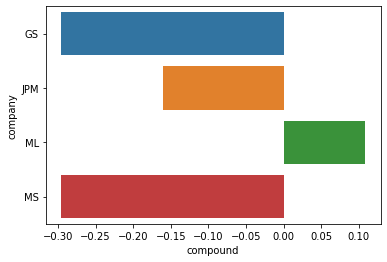

In [26]:
df_all_wm_com = pd.DataFrame(df_all_wm_com)
df_all_wm_com = df_all_wm_com.reset_index()
sns.barplot(y='company',x='compound',data=df_all_wm_com)

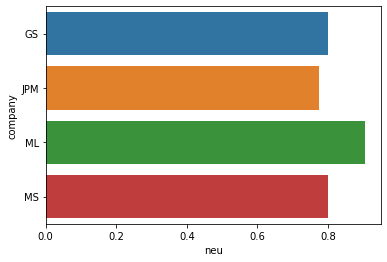

In [27]:
df_all_wm_neu = pd.DataFrame(df_all_wm_neu)
df_all_wm_neu = df_all_wm_neu.reset_index()
sns.barplot(y='company',x='neu',data=df_all_wm_neu)

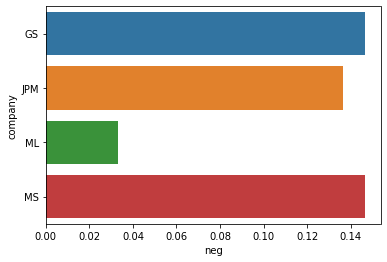

In [28]:
df_all_wm_neg = pd.DataFrame(df_all_wm_neg)
df_all_wm_neg = df_all_wm_neg.reset_index()
sns.barplot(y='company',x='neg',data=df_all_wm_neg)

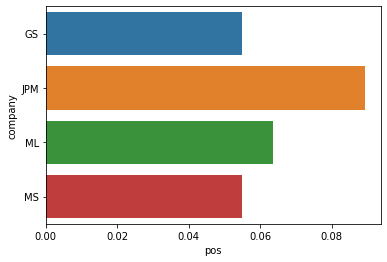

In [29]:
df_all_wm_pos = pd.DataFrame(df_all_wm_pos)
df_all_wm_pos = df_all_wm_pos.reset_index()
sns.barplot(y='company',x='pos',data=df_all_wm_pos)